# Exercise 3

## Feature Encoding

In [1]:
from sklearn.preprocessing import LabelEncoder
def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X

## Data preprocessing

       Age Nationality  Overall  Potential                 Club Position  \
0       31   Argentina       94         94         FC Barcelona       RF   
1       33    Portugal       94         94             Juventus       ST   
2       26      Brazil       92         93  Paris Saint-Germain       LW   
3       27       Spain       91         93    Manchester United       GK   
4       27     Belgium       91         92      Manchester City      RCM   
...    ...         ...      ...        ...                  ...      ...   
17950   19     England       47         65      Crewe Alexandra       CM   
17951   19      Sweden       47         63       Trelleborgs FF       ST   
17952   16     England       47         67     Cambridge United       ST   
17953   17     England       47         66      Tranmere Rovers       RW   
17954   16     England       46         66      Tranmere Rovers       CM   

       Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  Vision  \
0          84

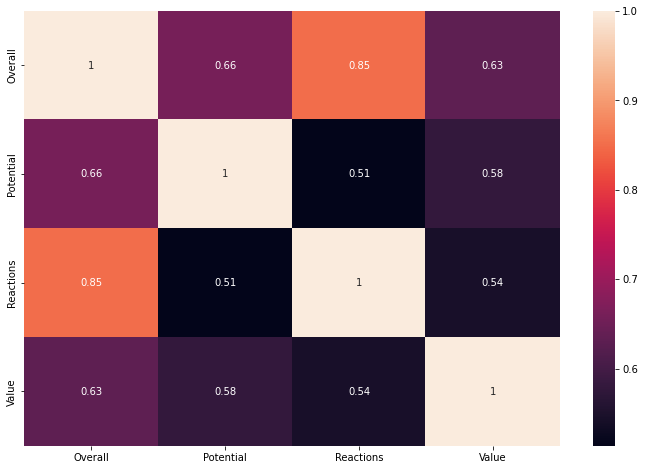

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Pre-processing
#Load players data
data = pd.read_csv('fifa19.csv')
#Drop the rows that contain missing values
data.dropna(how='any',inplace=True)
fifa_data=data.iloc[:,:]
X=data.iloc[:,1:40] #Features
print(X)
Y=data['Value'] #Label
cols=('Nationality','Club','Position')
X=Feature_Encoder(X,cols);

#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,shuffle=True)
#Get the correlation between the features
corr = fifa_data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']>0.5)]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = fifa_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

## Multiple Linear Regression

In [3]:
cls = linear_model.LinearRegression()
L = 0.0000001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
m1=0
m2=0
m3=0
c=0
n = float(len(X_train)) # Number of elements in X
print(n)
# D_m = np.zeros((3,)) #n=3
# D_c = 0.
# print(D_m)
for i in range(epochs):
  # Student code
    # for k in range(int(n)):
    Y_pred=m1*X_train["Reactions"]+m2*X_train["Potential"]+m3*X_train["Overall"]+c
    D_m1=(-2/n)*sum(X_train["Reactions"]*(y_train-Y_pred))
    D_m2=(-2/n)*sum(X_train["Potential"]*(y_train-Y_pred))
    D_m3=(-2/n)*sum(X_train["Overall"]*(y_train-Y_pred))

    D_c=(-2/n)*sum(y_train-Y_pred)
  # Step : Update
    m1 = m1 - L * D_m1  # Update m
    m2 = m2 - L * D_m2  # Update m
    m3 = m3 - L * D_m3  # Update m

    c = c - L * D_c  # Update c
  # Student code

12534.0


## Prediction

In [4]:
prediction=np.array(X_test)[:,0]*m1+np.array(X_test)[:,1]*m2+np.array(X_test)[:,2]*m3+c

cls.fit(X_train,y_train)
prediction2= cls.predict(X_test)

print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(np.asarray(y_test), prediction))
print('Mean Square Error 2', metrics.mean_squared_error(np.asarray(y_test), prediction2))

true_player_value=np.asarray(y_test)[1]
predicted_player_value=prediction[1]

print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))

Co-efficient of linear regression [-2.80615107e-01 -7.75827693e-04  5.68606505e-01  4.95223490e-02
  4.80032316e-04 -3.42299566e-03 -8.36492073e-03  1.04967933e-02
 -1.96447458e-02 -7.60292297e-03  2.93011402e-02  1.34858265e-03
 -3.56345220e-03  1.20223525e-02  5.05472398e-03 -5.32986185e-02
 -4.31324076e-03 -6.94922787e-03 -2.52071789e-02  4.63951883e-02
  1.03401342e-02 -1.88854904e-02  3.10162335e-03 -5.91322771e-03
 -9.40371555e-03 -1.61367058e-02 -1.71070585e-03 -5.47043933e-03
  1.04721569e-02  2.10150346e-02  6.98229694e-03  4.70146689e-03
  7.40064263e-03 -3.14157330e-03 -3.36234484e-03 -1.21997268e-03
 -1.34450658e-02 -2.74068762e-03 -3.85997815e-02]
Intercept of linear regression model -28.856327965364393
Mean Square Error 38.77262044877905
Mean Square Error 2 21.534005711225255
True value for the first player in the test set in millions is : 0.35
Predicted value for the first player in the test set in millions is : 2.206769397439999


## Polynomial Regression

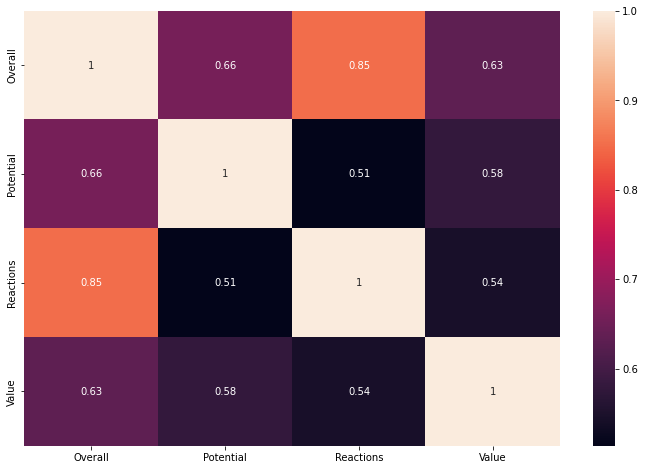

Co-efficient of linear regression [-3.33230119e-12  3.86763203e+00  1.06374903e-02 -6.01769156e+00
 -3.20830141e-03  2.16414048e-03  7.71521630e-02 -3.77085435e-02
 -1.51220795e-01  7.74999914e-02 -5.95623172e-02 -2.46920667e-01
  2.59312221e-01  9.57184197e-02 -3.95198401e-01 -1.74039546e-02
  2.59780319e-01  6.53455755e-02  1.09705586e-01  8.00718683e-02
 -4.97496459e-01 -7.43094199e-02  2.20731874e-01 -1.93500582e-02
 -5.53833761e-02  4.20951003e-02  1.96057392e-01  6.49428396e-02
 -2.12624109e-02 -1.71088330e-01 -1.15263263e-01 -2.99343972e-02
 -1.70556977e-02 -1.14049288e-01  9.42108825e-02  2.07979350e-01
  1.12041471e-01  2.64689492e-01 -5.62493694e-02 -5.14969466e-02
 -1.19303737e-02  2.49436601e-04 -3.35643629e-02 -2.16001445e-02
 -2.09039184e-05 -1.91128471e-04  1.11461835e-03 -3.00456101e-04
  1.08711201e-04  2.31407728e-03 -1.39226182e-03  1.04344018e-03
 -1.90811022e-03  3.45783283e-03 -5.10987435e-03  5.36647897e-03
 -5.69735984e-04 -2.17664494e-04  1.27890049e-03 -1.9019

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#Load players data
data = pd.read_csv('fifa19.csv')
#Drop the rows that contain missing values
data.dropna(how='any',inplace=True)
fifa_data=data.iloc[:,:]
X=data.iloc[:,1:40] #Features
Y=data['Value'] #Label
cols=('Nationality','Club','Position')
X=Feature_Encoder(X,cols);

#Split the data to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
#Get the correlation between the features
corr = fifa_data.corr()
#Top 50% Correlation training features with the Value
top_feature = corr.index[abs(corr['Value']>0.5)]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = fifa_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))


print('Co-efficient of linear regression',poly_model.coef_)
print('Intercept of linear regression model',poly_model.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

true_player_value=np.asarray(y_test)[0]
predicted_player_value=prediction[0]
print('True value for the first player in the test set in millions is : ' + str(true_player_value))
print('Predicted value for the first player in the test set in millions is : ' + str(predicted_player_value))